In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import math

from alex_module import df_prepper as df_prepper
from alex_module import plotter
from alex_module import df_describer

Load .csv 1 and combine with other 11, with `alex_module.df_prepper`

In [ ]:
df = pd.read_csv('raw_data/all_energy_statistics1.csv')
df = df_prepper.csv_combiner(df,verbose=False)

In [3]:
df_groupby_commodity = df_prepper.df_groupby(df,
                                             cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                             cols_to_groupby=['country_or_area','year','commodity_transaction'],
                                             aggregate='sum')
df_groupby_commodity

commodity_transaction country_or_area  Additives and Oxygenates - Exports  \
year                                                                        
1990                      Afghanistan                                 NaN   
1991                      Afghanistan                                 NaN   
1992                      Afghanistan                                 NaN   
1993                      Afghanistan                                 NaN   
1994                      Afghanistan                                 NaN   
...                               ...                                 ...   
2010                         Zimbabwe                                 NaN   
2011                         Zimbabwe                                 NaN   
2012                         Zimbabwe                                 NaN   
2013                         Zimbabwe                                 NaN   
2014                         Zimbabwe                                 NaN   

commodity_transaction  Additives and Oxygenates - Imports  \
year                                                        
1990                                                  NaN   
1991                                                  NaN   
1992                                                  NaN   
1993                                                  NaN   
1994                                                  NaN   
...                                                   ...   
2010                                                  NaN   
2011                                                  NaN   
2012                                                  NaN   
2013                                                  NaN   
2014                                                  NaN   

commodity_transaction  Additives and Oxygenates - Production  \
year                                                           
1990                                                     NaN   
1991                                                     NaN   
1992                                                     NaN   
1993                                                     NaN   
1994                                                     NaN   
...                                                      ...   
2010                                                     NaN   
2011                                                     NaN   
2012                                                     NaN   
2013                                                     NaN   
2014                                                     NaN   

commodity_transaction  Additives and Oxygenates - Receipts from other sources  \
year                                                                            
1990                                                                 NaN        
1991                                                                 NaN        
1992                                                                 NaN        
1993                                                                 NaN        
1994                                                                 NaN        
...                                                                  ...        
2010                                                                 NaN        
2011                                                                 NaN        
2012                                                                 NaN        
2013                                                                 NaN        
2014                                                                 NaN        

commodity_transaction  Additives and Oxygenates - Stock changes  \
year                                                              
1990                                                        NaN   
1991                                                        NaN   
1992                                             

# Features of the dataset:
- Country/ area
- Year
- Commodity transaction
- Unit
- Quantity
- Category

## Feature 1: Country

In [15]:
n = df['country_or_area'].nunique()

print(f'Number of unique country/ area values that appear: {n}')

Number of unique country/ area values that appear: 243


### Exploration of country appearances in the data 
- Which countries have the most and least data?
- What is the average amount of data points per country?
- Splitting countries into quartiles/ quintiles based on their data volume

In [16]:
print('Amount of times each country/ area appears in the data:\n'+'-'*50)
df['country_or_area'].value_counts()

Amount of times each country/ area appears in the data:
--------------------------------------------------


Germany                                     20422
United States                               19847
Poland                                      19802
Austria                                     17440
Romania                                     17357
                                            ...  
Antarctic Fisheries                            90
Pacific Islands (former)                       68
Yemen, Dem. (former)                           61
Yemen Arab Rep. (former)                       45
Commonwealth of Independent States (CIS)       16
Name: country_or_area, Length: 243, dtype: int64

Text(0.5, 1.0, 'Distribution of data points per country')

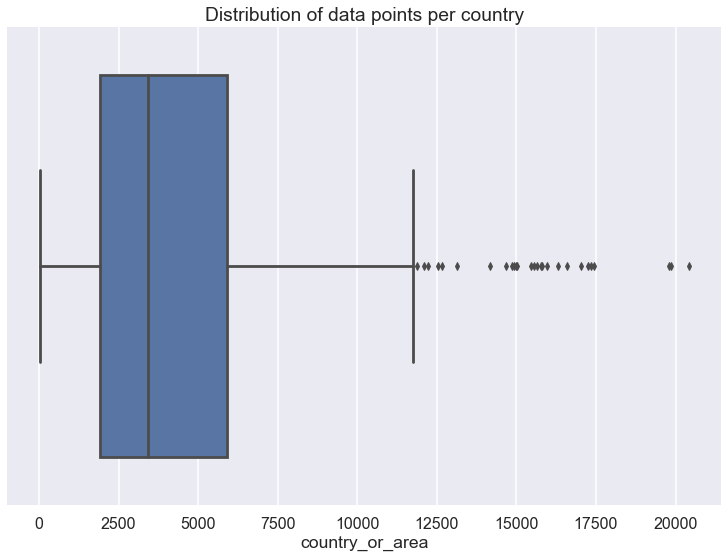

In [17]:
country_counts = df['country_or_area'].value_counts().to_frame()

fig = sns.boxplot(country_counts['country_or_area'])
fig.set_title('Distribution of data points per country')

In [18]:
print('Average number of data points per country: {}'.format(round(df['country_or_area'].value_counts().mean())))
print('Median number of data points per country: {}'.format(round(df['country_or_area'].value_counts().median())))

Average number of data points per country: 4895
Median number of data points per country: 3406


#### Quartiles -> putting the countries into 4 groups based on count of data points

In [19]:
df

country_or_area                commodity_transaction  year  \
0             Austria   Additives and Oxygenates - Exports  1996   
1             Austria   Additives and Oxygenates - Exports  1995   
2             Belgium   Additives and Oxygenates - Exports  2014   
3             Belgium   Additives and Oxygenates - Exports  2013   
4             Belgium   Additives and Oxygenates - Exports  2012   
...               ...                                  ...   ...   
89478        Viet Nam  Electricity - total wind production  2012   
89479        Viet Nam  Electricity - total wind production  2011   
89480        Viet Nam  Electricity - total wind production  2010   
89481        Viet Nam  Electricity - total wind production  2009   
89482        Viet Nam  Electricity - total wind production  2008   

                          unit  quantity  quantity_footnotes  \
0       Metric tons,  thousand       5.0                 NaN   
1       Metric tons,  thousand      17.0                 NaN   
2       Metric tons,  thousand       0.0                 NaN   
3       Metric tons,  thousand       0.0                 NaN   
4       Metric tons,  thousand      35.0                 NaN   
...                        ...       ...                 ...   
89478  Kilowatt-hours, million      92.0                 1.0   
89479  Kilowatt-hours, million      87.0                 NaN   
89480  Kilowatt-hours, million      50.0                 NaN   
89481  Kilowatt-hours, million      10.0                 NaN   
89482  Kilowatt-hours, million       1.0                 NaN   

                       category  
0      additives_and_oxygenates  
1      additives_and_oxygenates  
2      additives_and_oxygenates  
3      additives_and_oxygenates  
4      additives_and_oxygenates  
...                         ...  
89478          wind_electricity  
89479          wind_electricity  
89480          wind_electricity  
89481          wind_electricity  
89482          wind_electricity  

[1189482 rows x 7 columns]

In [26]:
country_groups = df_describer.create_even_groups(df=df,column='country_or_area',n_groups=15,verbose=False)

# add ability to do a sum rather than just a count ! qcut by total quantity?

In [21]:
country_groups

country_or_area     Label
Germany                                20422   Group 1
United States                          19847   Group 1
Poland                                 19802   Group 1
Austria                                17440   Group 1
Romania                                17357   Group 1
...                                      ...       ...
Bonaire, St Eustatius, Saba              224  Group 15
Sint Maarten (Dutch part)                219  Group 15
German Dem. R. (former)                  106  Group 15
Antarctic Fisheries                       90  Group 15
Pacific Islands (former)                  68  Group 15

[240 rows x 2 columns]

In [24]:
country_groups['Label'].value_counts()

Group 9     16
Group 5     16
Group 8     16
Group 13    16
Group 6     16
Group 11    16
Group 12    16
Group 3     16
Group 1     16
Group 4     16
Group 2     16
Group 10    16
Group 14    16
Group 7     16
Group 15    16
Name: Label, dtype: int64

In [22]:
country_groups[country_groups['Label']=='Group 1']

country_or_area    Label
Germany                       20422  Group 1
United States                 19847  Group 1
Poland                        19802  Group 1
Austria                       17440  Group 1
Romania                       17357  Group 1
France                        17236  Group 1
Japan                         17037  Group 1
Czechia                       16588  Group 1
Italy                         16312  Group 1
Netherlands                   15955  Group 1
Spain                         15815  Group 1
Hungary                       15778  Group 1
Australia                     15652  Group 1
United Kingdom                15536  Group 1
Canada                        15453  Group 1
Russian Federation            15020  Group 1

In [49]:
top_countries = country_groups[country_groups['Label']=='Group 1'].index.to_list()

In [50]:
top_countries

['Germany',
 'United States',
 'Poland',
 'Austria',
 'Romania',
 'France',
 'Japan',
 'Czechia',
 'Italy',
 'Netherlands',
 'Spain',
 'Hungary',
 'Australia',
 'United Kingdom',
 'Canada',
 'Russian Federation']

In [51]:
df_top = df[df['country_or_area'].isin(top_countries)].copy()

In [52]:
x = df_top[df_top['category']=='wind_electricity'].groupby(['country_or_area','year']).sum()

In [53]:
x.drop('quantity_footnotes',axis=1,inplace=True)

In [54]:
x = x.unstack()

In [55]:
x

quantity                                                  \
year                   1990    1991    1992    1993    1994    1995    1996   
country_or_area                                                               
Australia               NaN     NaN     NaN     NaN     4.0     7.0     7.0   
Austria                 NaN     NaN     NaN     NaN     NaN     1.0     5.0   
Canada                  NaN     NaN    59.0    59.0    59.0    59.0    62.0   
Czechia                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
France                  NaN     NaN     NaN     2.0     5.0     5.0     7.0   
Germany                 NaN   215.0   291.0   674.0  1428.0  1712.0  2078.0   
Hungary                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Italy                   2.0     3.0     2.0     4.0     7.0     9.0    33.0   
Japan                   0.0     0.0     0.0     1.0     1.0     1.0     2.0   
Netherlands            56.0    88.0   147.0   174.0   238.0   317.0   437.0   
Poland                  NaN     NaN     NaN     NaN     NaN     1.0     0.0   
Romania                 1.0     NaN     NaN     NaN     NaN     NaN     NaN   
Russian Federation      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Spain                  14.0    15.0   103.0   116.0   175.0   270.0   364.0   
United Kingdom          9.0    11.0    40.0   218.0   342.0   391.0   488.0   
United States        3066.0  3051.0  2917.0  3053.0  3483.0  3196.0  3410.0   

                                            ...                             \
year                  1997    1998    1999  ...     2005     2006     2007   
country_or_area                             ...                              
Australia              7.0     8.0    28.0  ...    885.0   1713.0   2611.0   
Austria               20.0    45.0    51.0  ...   1331.0   1752.0   2037.0   
Canada                62.0    62.0   164.0  ...   1567.0   2473.0   3007.0   
Czechia                NaN     NaN     NaN  ...     21.0     49.0    125.0   
France                11.0    19.0    37.0  ...    962.0   2182.0   4070.0   
Germany             3034.0  4593.0  5528.0  ...  27229.0  30710.0  39713.0   
Hungary                NaN     NaN     NaN  ...     10.0     43.0    110.0   
Italy                118.0   231.0   403.0  ...   2344.0   2971.0   4034.0   
Japan                  1.0     7.0    38.0  ...   1754.0   2210.0   2624.0   
Netherlands          475.0   640.0   645.0  ...   2067.0   2735.0   3438.0   
Poland                 2.0     4.0     4.0  ...    135.0    256.0    522.0   
Romania                NaN     NaN     NaN  ...      0.0      0.0      3.0   
Russian Federation     0.0     0.0     2.0  ...      7.0      5.0      7.0   
Spain                742.0  1352.0  2744.0  ...  21176.0  23297.0  27568.0   
United Kingdom       667.0   877.0   850.0  ...   2904.0   4225.0   5274.0   
United States       3254.0  3018.0  4802.0  ...  17881.0  26676.0  34603.0   

                                                                             \
year                   2008     2009     2010      2011      2012      2013   
country_or_area                                                               
Australia            3093.0   3824.0   5052.0    6085.0    6970.0    7960.0   
Austria              2011.0   1954.0   2064.0    1936.0    2462.0    3152.0   
Canada               3788.0   6641.0   8724.0   10187.0   11310.0   17963.0   
Czechia               245.0    288.0    335.0     397.0     416.0     481.0   
France               5694.0   7912.0   9945.0   12051.0   14914.0   16034.0   
Germany             40574.0  38647.0  37793.0   48883.0   50670.0   51708.0   
Hungary               205.0    331.0    534.0     626.0     770.0     718.0   
Italy                4861.0   6543.0   9126.0    9856.0   13407.0   14897.0   
Japan                2946.0   3613.0   3962.0    4559.0    4722.0    4286.0   
Netherlands          4260.0   4581.0   3994.0    5101.0    4981.0    5627.0   
Poland 

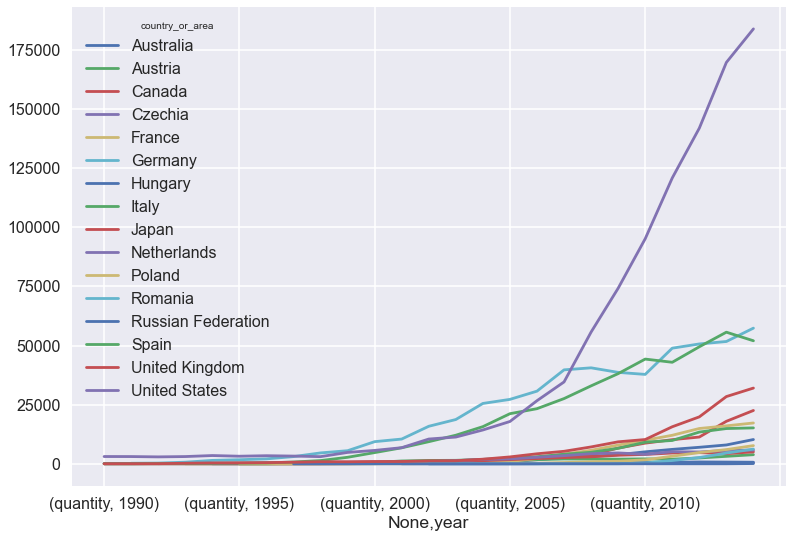

In [58]:
x.transpose().plot()

#### Average and median values per quartile

In [101]:
# Instantiating empty dataframe
d = {'Quartile':[''],'Average Data Points':[''],'Median Data Points':['']}
quartile_mean_and_medians = pd.DataFrame(d)

In [102]:
verbose=False

for quartile in ['Q1','Q2','Q3','Q4']:
    df_ = country_counts[country_counts['quartiles']==quartile]
    avg_data = round(df_['country_or_area'].mean())
    median_data = round(df_['country_or_area'].median())
    
    if verbose:
        print(f'{quartile} average count of data points: {avg_data}')
        print(f'{quartile} median count of data points: {median_data}')
        print('\n')

    d = {'Quartile':[quartile],'Average Data Points':[avg_data],'Median Data Points':[median_data]}
    d_ = pd.DataFrame(d)
    quartile_mean_and_medians = quartile_mean_and_medians.append(d_)

In [103]:
# Removing empty row I made when instantiating the empty dataframe (ugly method I know)
quartile_mean_and_medians = quartile_mean_and_medians.iloc[1:,:]

quartile_mean_and_medians.set_index('Quartile',inplace=True)

In [104]:
quartile_mean_and_medians

Average Data Points Median Data Points
Quartile                                       
Q1                     11538              11270
Q2                      4417               4324
Q3                      2627               2655
Q4                       989                940

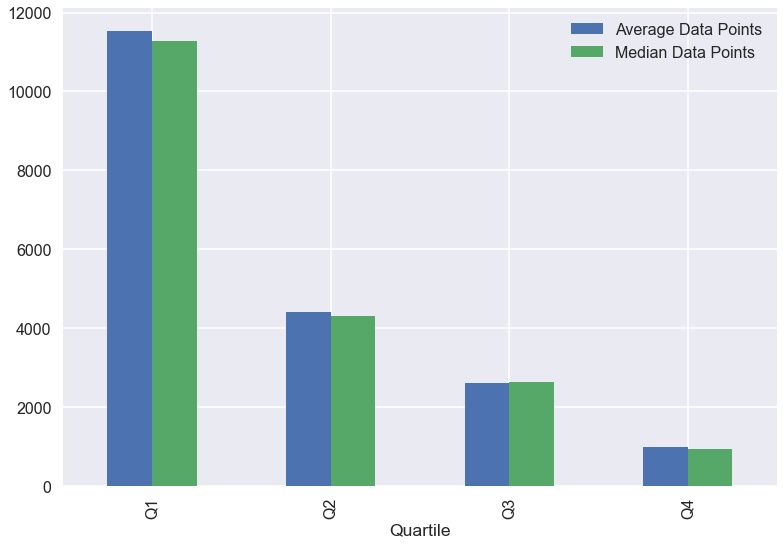

In [107]:
quartile_mean_and_medians.plot.bar()

# Plot the top 10 countries by datapoints

(To do)

In [14]:
# Top 10 dealers by data points
df['country_or_area'].value_counts(normalize=True)

Germany                                     0.017169
United States                               0.016685
Poland                                      0.016648
Austria                                     0.014662
Romania                                     0.014592
                                              ...   
Antarctic Fisheries                         0.000076
Pacific Islands (former)                    0.000057
Yemen, Dem. (former)                        0.000051
Yemen Arab Rep. (former)                    0.000038
Commonwealth of Independent States (CIS)    0.000013
Name: country_or_area, Length: 243, dtype: float64

## Group by:
#### Commodity_transaction

After loading in my combined dataframe, next steps are to:

- Create a groupby with `alex_module.df_groupby()`
- Flatten the groupby with `alex_module.df_groupby_flatten()`

In [8]:
df_groupby_commodity = df_prepper.df_groupby(df,
                                             cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                             cols_to_groupby=['country_or_area','year','commodity_transaction'],
                                             aggregate='sum')

df_groupby_commodity = df_prepper.df_groupby_flatten(df_groupby_commodity)
df_groupby_commodity

commodity_transaction country_or_area  Additives and Oxygenates - Exports  \
year                                                                        
1990                      Afghanistan                                 NaN   
1991                      Afghanistan                                 NaN   
1992                      Afghanistan                                 NaN   
1993                      Afghanistan                                 NaN   
1994                      Afghanistan                                 NaN   
...                               ...                                 ...   
2010                         Zimbabwe                                 NaN   
2011                         Zimbabwe                                 NaN   
2012                         Zimbabwe                                 NaN   
2013                         Zimbabwe                                 NaN   
2014                         Zimbabwe                                 NaN   

commodity_transaction  Additives and Oxygenates - Imports  \
year                                                        
1990                                                  NaN   
1991                                                  NaN   
1992                                                  NaN   
1993                                                  NaN   
1994                                                  NaN   
...                                                   ...   
2010                                                  NaN   
2011                                                  NaN   
2012                                                  NaN   
2013                                                  NaN   
2014                                                  NaN   

commodity_transaction  Additives and Oxygenates - Production  \
year                                                           
1990                                                     NaN   
1991                                                     NaN   
1992                                                     NaN   
1993                                                     NaN   
1994                                                     NaN   
...                                                      ...   
2010                                                     NaN   
2011                                                     NaN   
2012                                                     NaN   
2013                                                     NaN   
2014                                                     NaN   

commodity_transaction  Additives and Oxygenates - Receipts from other sources  \
year                                                                            
1990                                                                 NaN        
1991                                                                 NaN        
1992                                                                 NaN        
1993                                                                 NaN        
1994                                                                 NaN        
...                                                                  ...        
2010                                                                 NaN        
2011                                                                 NaN        
2012                                                                 NaN        
2013                                                                 NaN        
2014                                                                 NaN        

commodity_transaction  Additives and Oxygenates - Stock changes  \
year                                                              
1990                                                        NaN   
1991                                                        NaN   
1992                                             

## Group by:
#### Category

In [9]:
df_groupby_category = df_prepper.df_groupby(df,
                                            cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                            cols_to_groupby=['country_or_area','year','category'],
                                            aggregate='sum')

df_groupby_category = df_prepper.df_groupby_flatten(df_groupby_category)
df_groupby_category

category country_or_area  additives_and_oxygenates  animal_waste  anthracite  \
year                                                                           
1990         Afghanistan                       NaN           NaN         NaN   
1991         Afghanistan                       NaN           NaN         NaN   
1992         Afghanistan                       NaN           NaN         NaN   
1993         Afghanistan                       NaN           NaN         NaN   
1994         Afghanistan                       NaN           NaN         NaN   
...                  ...                       ...           ...         ...   
2010            Zimbabwe                       NaN           NaN         2.2   
2011            Zimbabwe                       NaN           NaN         5.8   
2012            Zimbabwe                       NaN           NaN        10.4   
2013            Zimbabwe                       NaN           NaN         0.0   
2014            Zimbabwe                       NaN           NaN         0.0   

category  aviation_gasoline      bagasse  biodiesel  biogases  biogasoline  \
year                                                                         
1990                   12.0          NaN        NaN       NaN          NaN   
1991                   12.0          NaN        NaN       NaN          NaN   
1992                    0.0          NaN        NaN       NaN          NaN   
1993                    NaN          NaN        NaN       NaN          NaN   
1994                    NaN          NaN        NaN       NaN          NaN   
...                     ...          ...        ...       ...          ...   
2010                    2.0  3188.251900        NaN       NaN          NaN   
2011                    2.0  2373.059141        NaN       NaN          NaN   
2012                    2.0  1557.218891        NaN       NaN          NaN   
2013                    2.0  1547.506506        NaN       NaN          NaN   
2014                    4.0  1342.898952        NaN       NaN        258.0   

category  bitumen  ...  refinery_gas  solar_electricity  sub_bituminous_coal  \
year               ...                                                         
1990          NaN  ...           NaN                NaN                  NaN   
1991          NaN  ...           NaN                NaN                  NaN   
1992          NaN  ...           NaN                NaN                  NaN   
1993          NaN  ...           NaN                NaN                  NaN   
1994          NaN  ...           NaN                NaN                  NaN   
...           ...  ...           ...                ...                  ...   
2010          NaN  ...           NaN                NaN                  NaN   
2011          NaN  ...           NaN                NaN                  NaN   
2012          NaN  ...           NaN                NaN                  NaN   
2013          NaN  ...           NaN                NaN                  NaN   
2014          NaN  ...           NaN                NaN                  NaN   

category  thermal_electricity  tide_wave_and_ocean_electricity  \
year                                                             
1990                    364.0                              NaN   
1991                    325.0                              NaN   
1992                    225.0                              NaN   
1993                    220.0                              NaN   
1994                    215.0                              NaN   
...                       ...                              ...   
2010                   2840.1                              NaN   
2011                   3975.4                              NaN   
2012                   3761.3                              NaN   
2013                   4517.0                              NaN   
2014                   4592.0                              NaN   

category  total_electricity  total_refinery_

## Group by:
#### Unit

In [10]:
df_groupby_unit = df_prepper.df_groupby(df,
                                        cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                        cols_to_groupby=['country_or_area','year','unit'],
                                        aggregate='sum')

df_groupby_unit = df_prepper.df_groupby_flatten(df_groupby_unit)
df_groupby_unit

unit country_or_area  Cubic metres, thousand  Kilowatt-hours, million  \
year                                                                    
1990     Afghanistan             3679.368000                   8065.0   
1991     Afghanistan             3786.318000                   7245.0   
1992     Afghanistan             4028.724000                   5447.0   
1993     Afghanistan             4325.406000                   6465.0   
1994     Afghanistan             4656.120000                   6383.0   
...              ...                     ...                      ...   
2010        Zimbabwe           111946.250685                  84457.0   
2011        Zimbabwe           114513.847837                  91158.8   
2012        Zimbabwe           117320.963328                  89050.5   
2013        Zimbabwe           120322.933770                  94514.0   
2014        Zimbabwe           123411.713191                  96550.0   

unit  Kilowatts,  thousand  Metric Tons  Metric tons,  thousand  Terajoules  
year                                                                         
1990                1976.0          NaN            1.094542e+06   3960729.0  
1991                1976.0          NaN            8.042161e+05     56770.0  
1992                1976.0          NaN            8.021577e+05     52551.0  
1993                1976.0          NaN            1.092106e+06   3913929.0  
1994                1976.0          NaN            8.020524e+05     48750.0  
...                    ...          ...                     ...         ...  
2010                8448.0          NaN            3.793025e+04    633546.0  
2011                8448.0       1400.0            3.989046e+04    648702.0  
2012                8448.0          NaN            3.601022e+04    665190.0  
2013                8448.0          NaN            4.209511e+04    682356.0  
2014                7968.0          NaN            5.155832e+07    699126.0  

[5568 rows x 7 columns]

## Plotting any of these flatted groupbys:

In [7]:
df_to_plot=df_groupby_unit[df_groupby_unit['country_or_area']=='United Kingdom'].copy()

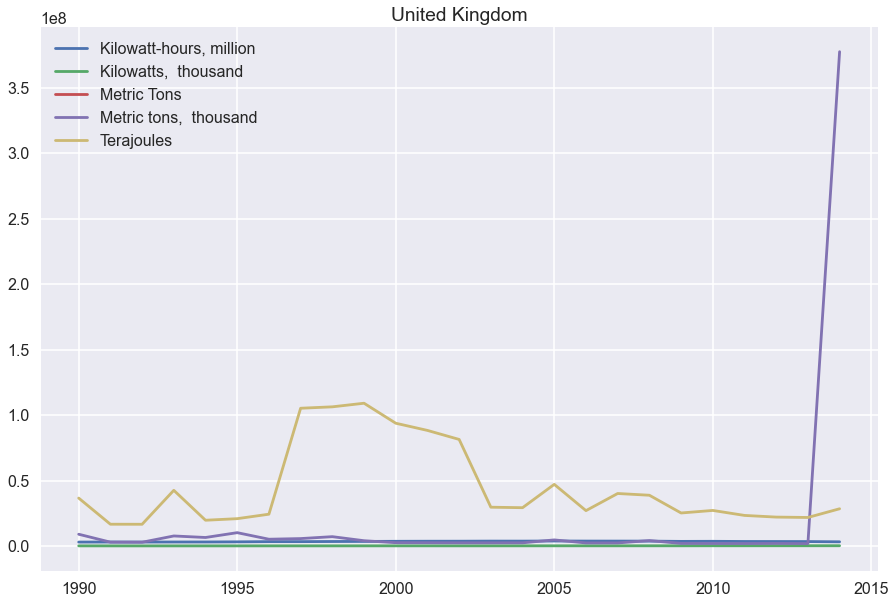

In [8]:
plotter.plot_from_flattened(df=df_to_plot,
                    x=df_to_plot.index,
                    y=df_to_plot.columns[2:],
                    index_as_x=True,
                    title='United Kingdom')

# Plotting 15 random countries

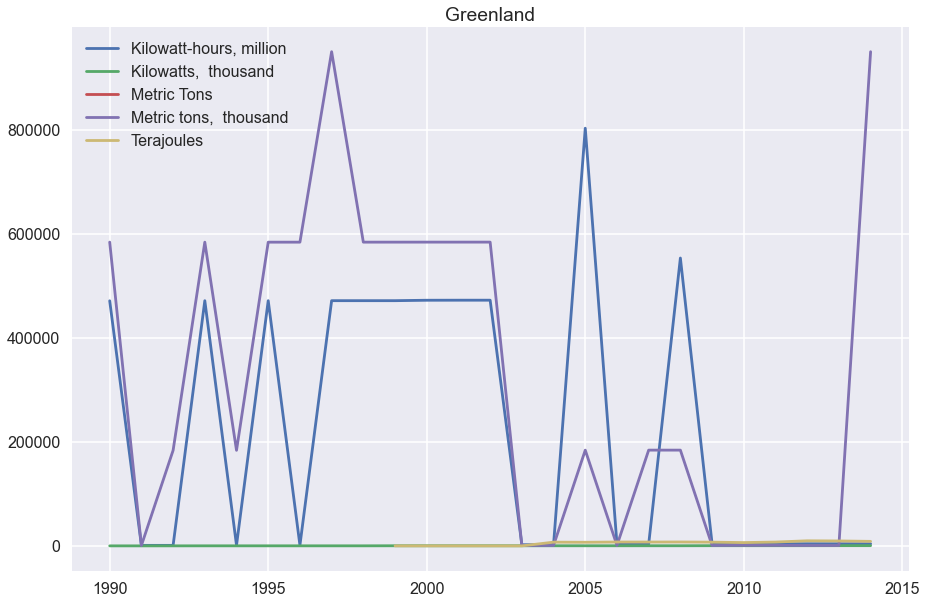

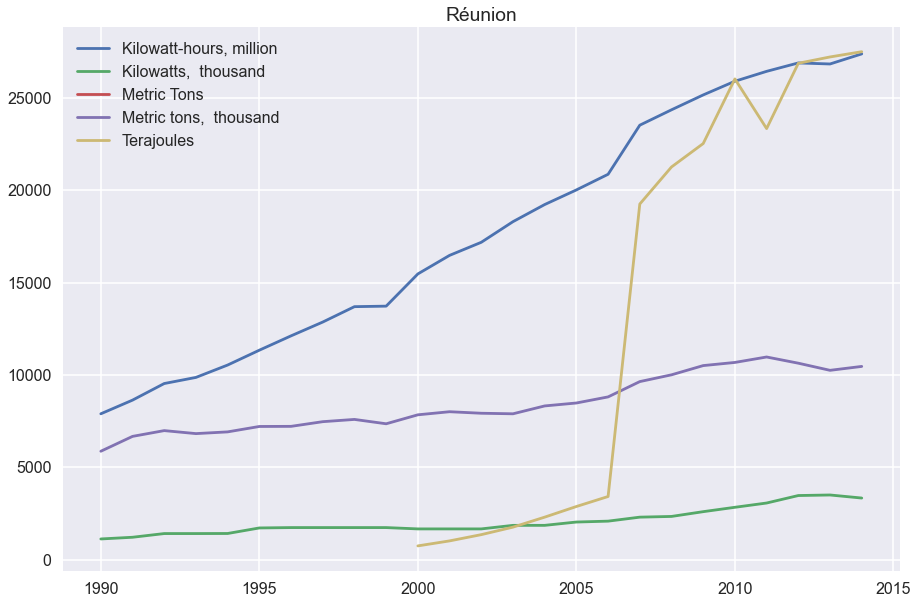

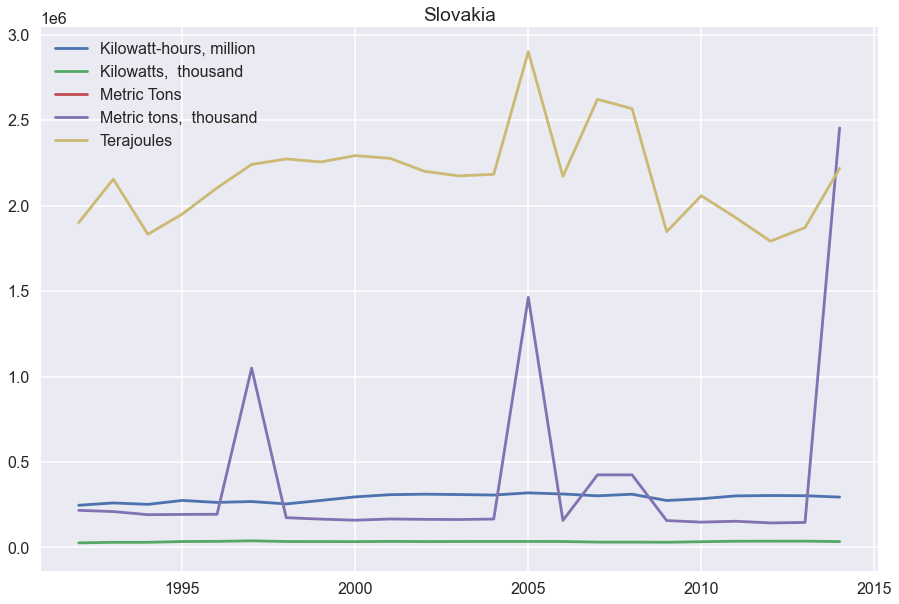

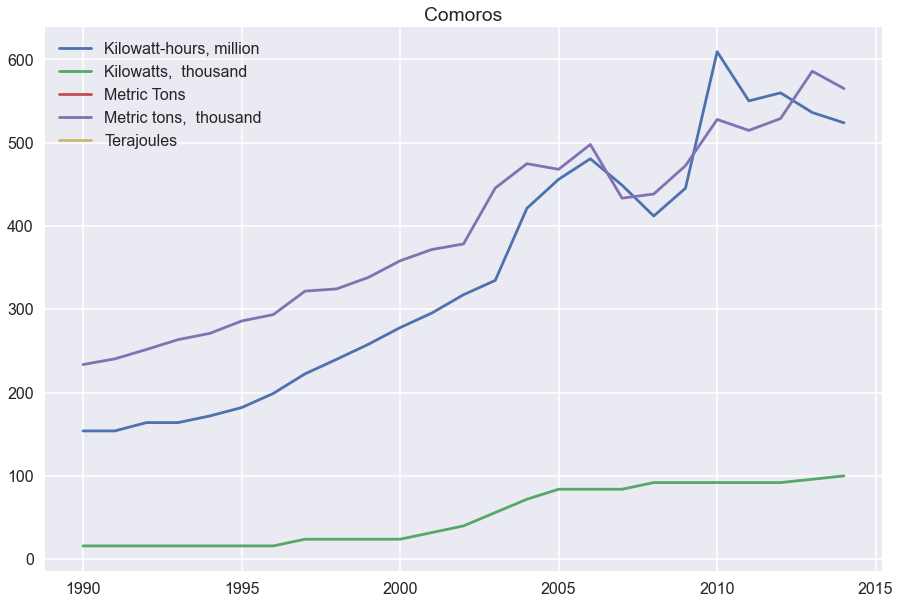

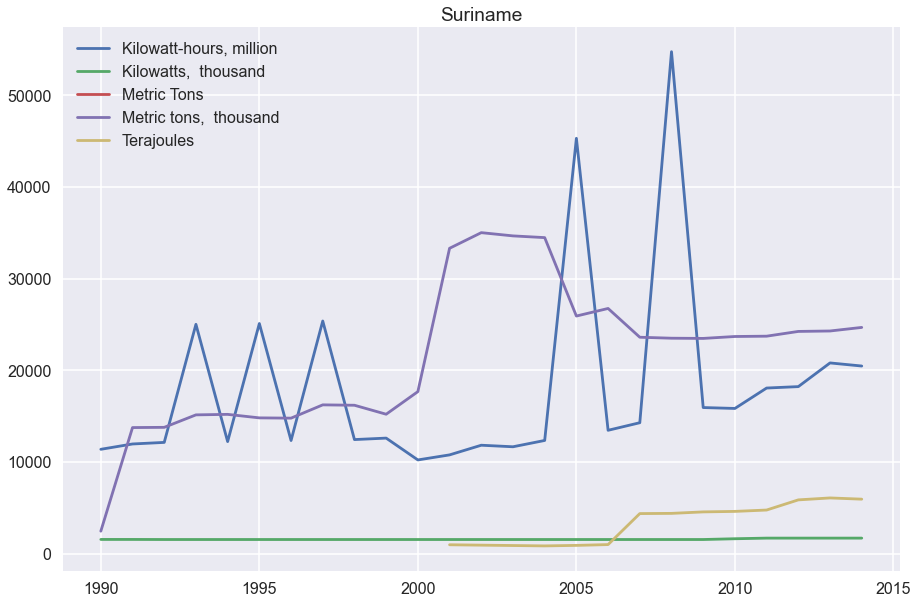

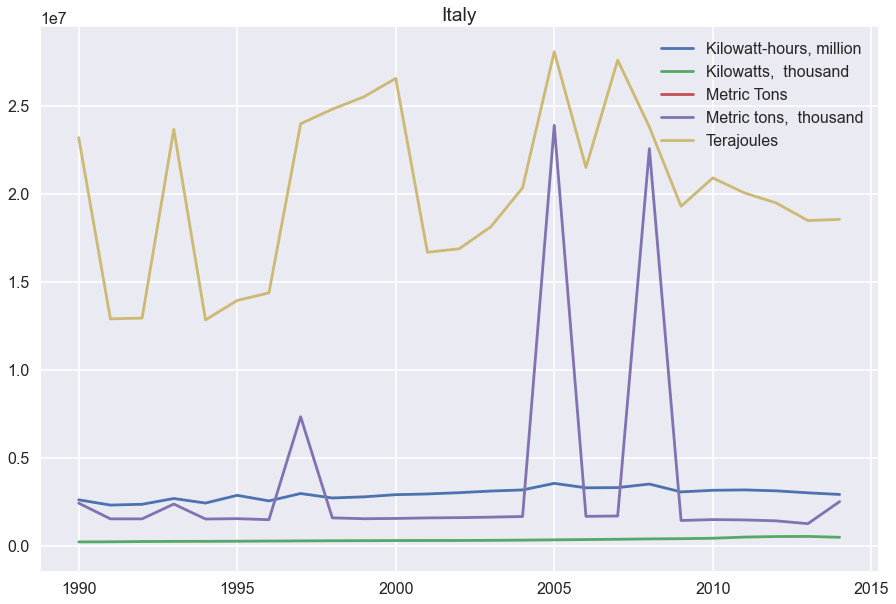

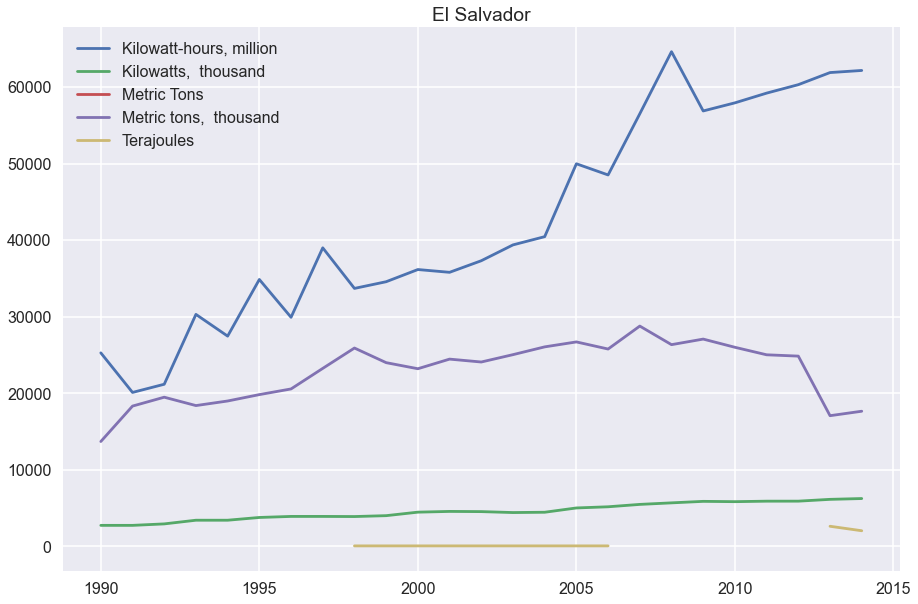

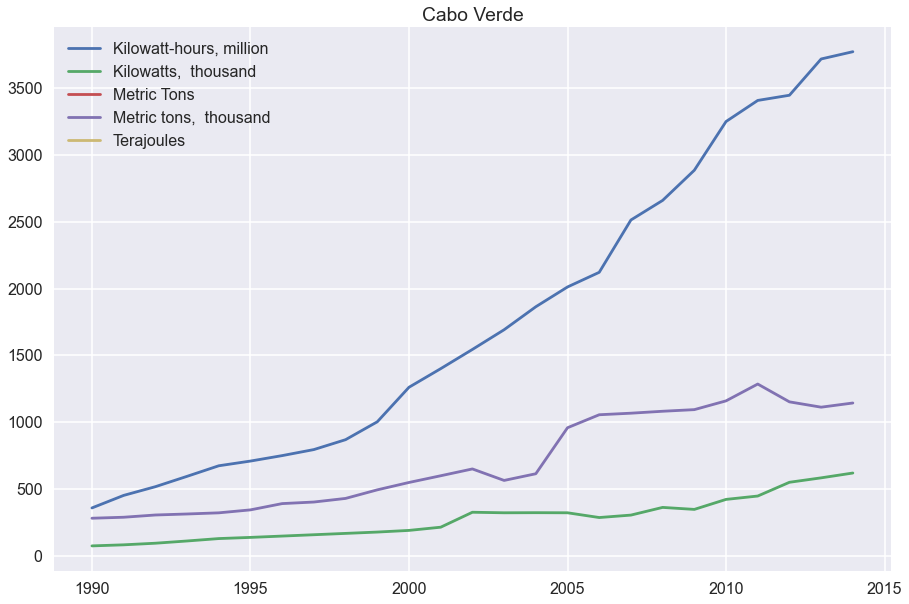

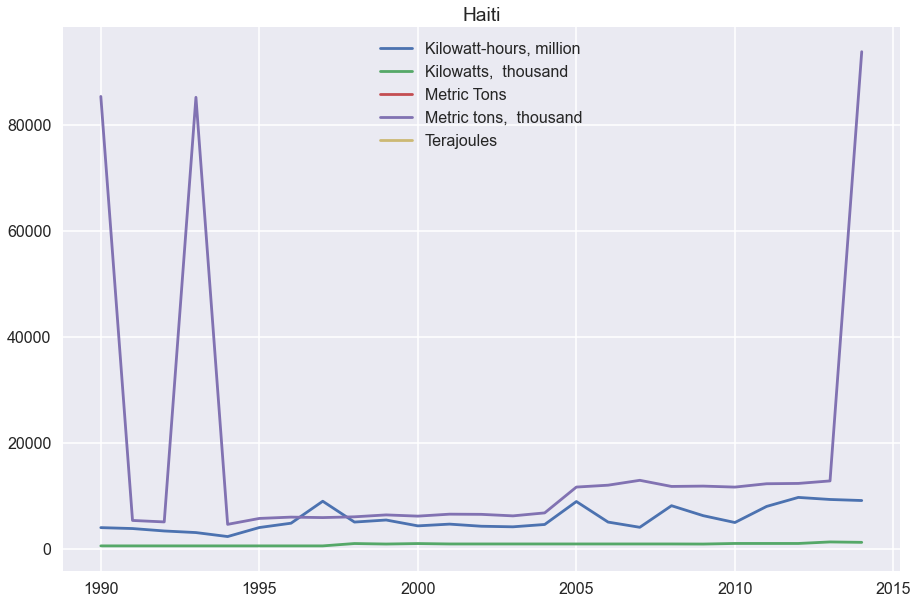

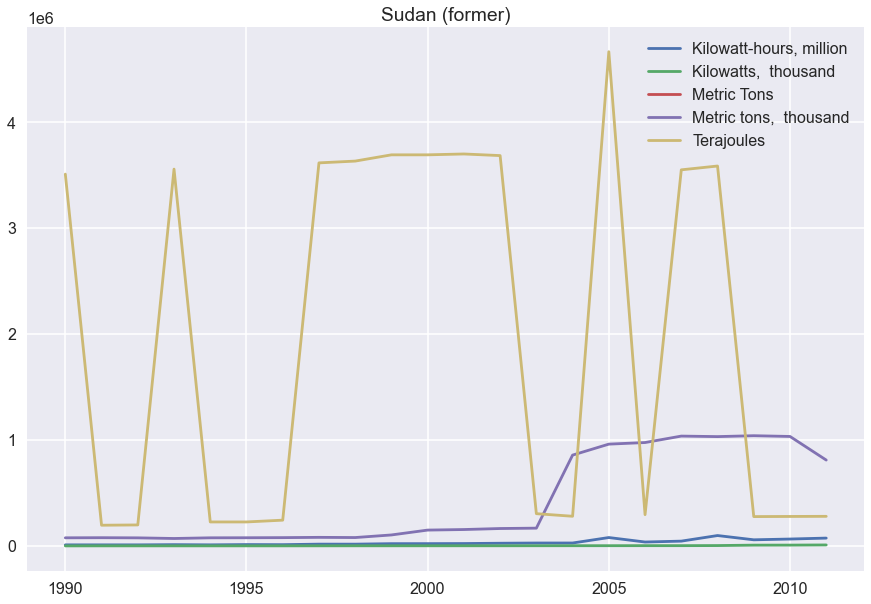

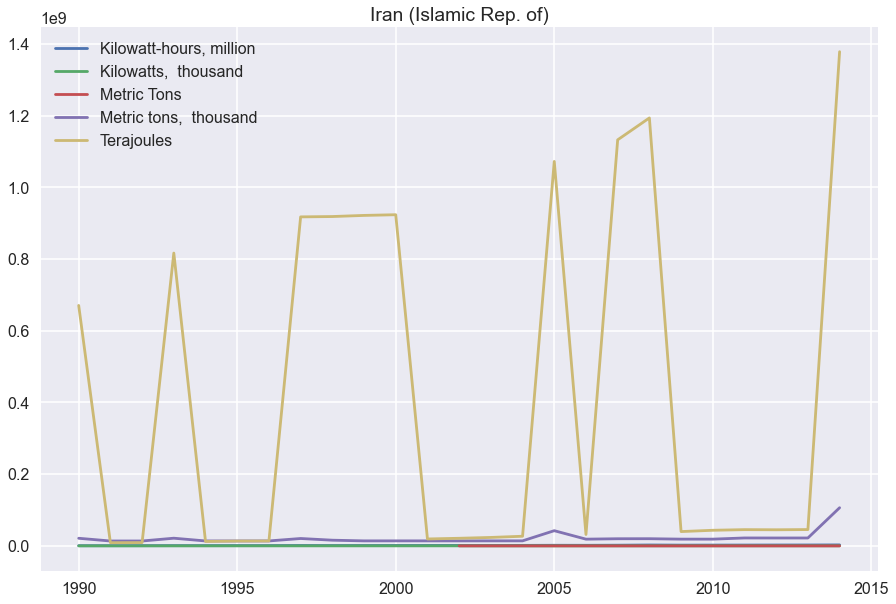

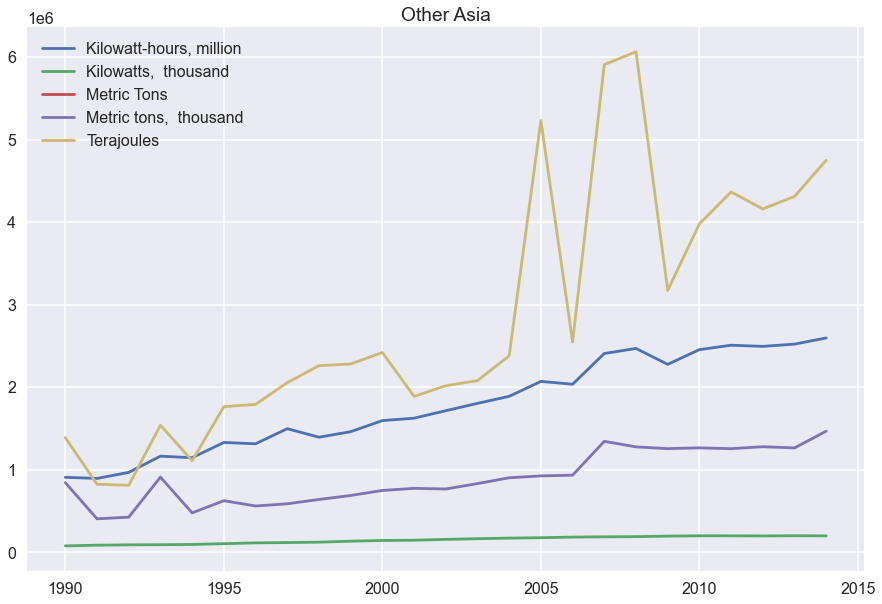

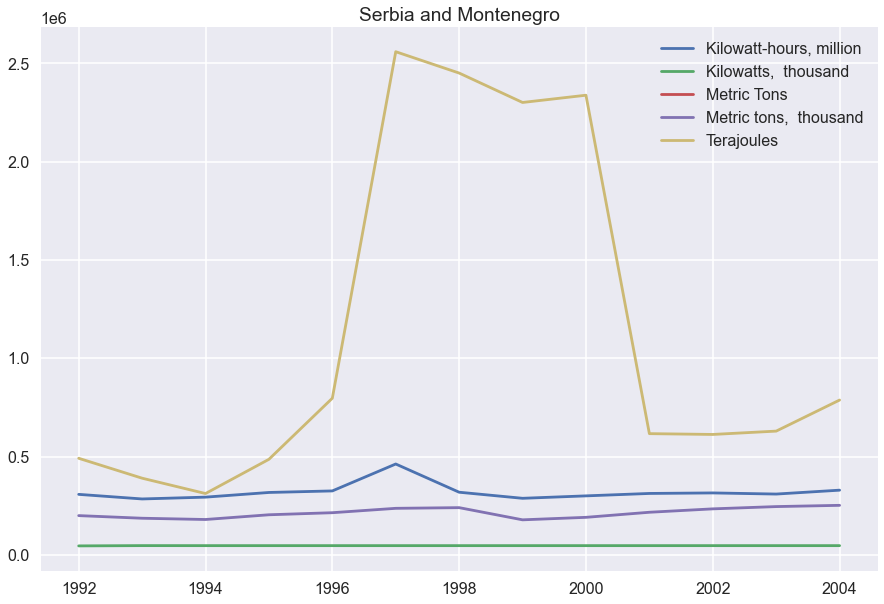

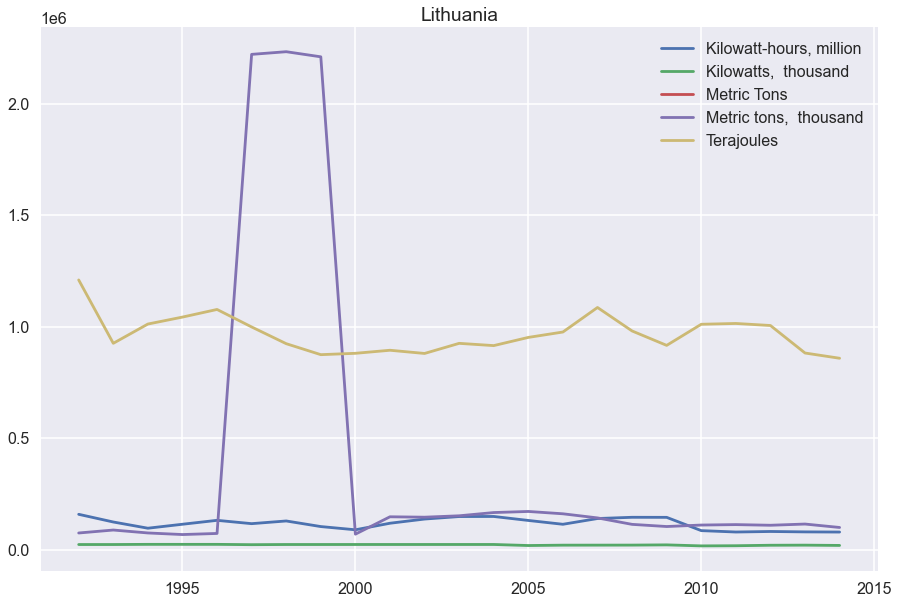

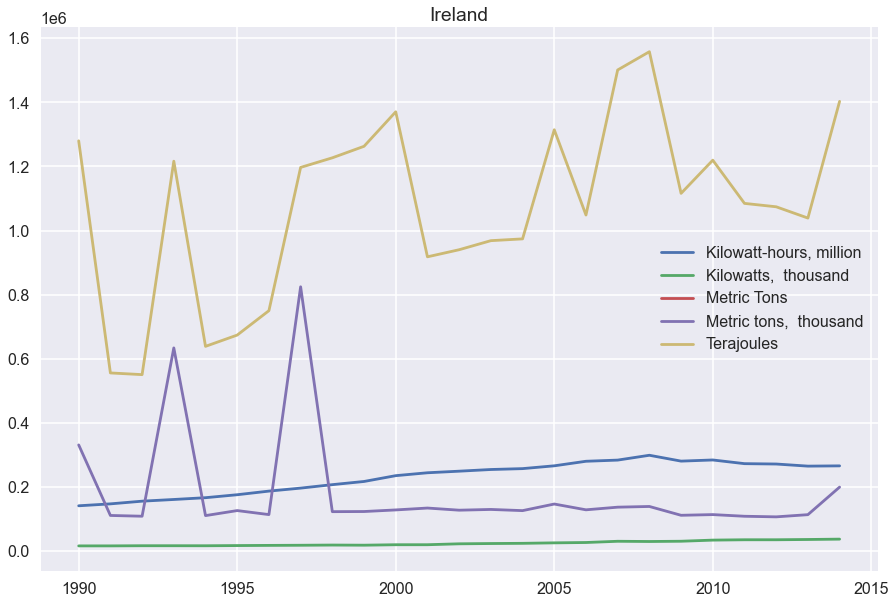

In [9]:
# Getting list of countries (removing duplicates)
country_list = df_groupby_unit['country_or_area'].to_list()
country_list = list(dict.fromkeys(country_list))

for i in np.arange(15): # Won't plot all as it makes the output 15MB and Jupyter throw a load of duplicate warnings. Best practice would be to save every graph to folder.
    country_to_plot = random.choice(country_list)
    df_to_plot=df_groupby_unit[df_groupby_unit['country_or_area']==country_to_plot].copy()
    
    plotter.plot_from_flattened(df=df_to_plot,
                    x=df_to_plot.index,
                    y=df_to_plot.columns[2:],
                    index_as_x=True,
                    title=country_to_plot)